# Insurance Claims- Fraud Detection
### Problem Statement:
## Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

### Note: Use the link below to reach to your dataset. 


##### Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

# Import libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Import dataset

In [2]:
# Importing Insurance Claims dataset Csv file using pandas
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

## Exploratory Data Analysis

In [3]:
# Preview the dataset
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
# No. of Rows and Columns
df.shape

(1000, 40)

* We can see that there are 1000 instances and 24 variables in the data set.

In [5]:
#View summary of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

## Observation
* We can see that the dataset contains mixture of categorical and numerical variables.

* Categorical variables have data type object.

* Numerical variables have data type float64.

* 21 features are categorical and 19 are numerical. Our target variable is categorical.

In [6]:
# View statistical properties of dataset 
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [7]:
# View column names 
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [8]:
# duplicate columns
df.duplicated().sum()

0

* No Duplicate values

In [9]:
# Number of unique values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

* Policy number and incident location are unique features and will not have any impact on the machine learning hence we will drop that column

In [10]:
# drop policy_number','incident_location' column
df.drop(['policy_number','incident_location'],axis=1,inplace=True)

In [11]:
# unique Values
df.police_report_available.unique()

array(['YES', '?', 'NO'], dtype=object)

* will have to impute "?"

In [12]:
df.replace('?',np.NaN,inplace=True)
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


## Data Imputation

In [13]:
# No. of Missing Values
df.isnull().sum()

months_as_customer                0
age                               0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                 360
bodily_injuries                   0
witnesses                   

* _c39 has 1000 null values,means there is o data available hence we will drop the same.

In [14]:
# drop '_c39'column
df.drop(['_c39'],axis=1,inplace=True)

In [15]:
# Lets fill the null values for collision type.
df.collision_type.unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [16]:
#We will use mode method to fill this Nan values.

df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [17]:
#Lets fill the null values for property_damage.
df.property_damage.unique()

array(['YES', nan, 'NO'], dtype=object)

In [18]:
#Again we will use the mode method to replace the Nan value.

df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [19]:
##Lets fill the null values for police_report_available
df.police_report_available.unique()

array(['YES', nan, 'NO'], dtype=object)

In [20]:
##Again we will use the mode method to replace the Nan value.
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [21]:
# check missing vales again
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

### Good to move ahead, imputed all missing values!

In [22]:
# change to datetime
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['Month'] = pd.DatetimeIndex(df['policy_bind_date']).month
df['Year'] = pd.DatetimeIndex(df['policy_bind_date']).year
df['Day'] = df['policy_bind_date'].dt.day

In [23]:
# drop policy_bind_date column
df.drop(['policy_bind_date'],axis=1,inplace=True)
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,6510,13020,52080,Saab,92x,2004,Y,10,2014,17
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,780,780,3510,Mercedes,E400,2007,Y,6,2006,27
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,7700,3850,23100,Dodge,RAM,2007,N,6,2000,9
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,1990,25
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1300,650,4550,Accura,RSX,2009,N,6,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,17440,8720,61040,Honda,Accord,2006,N,7,1991,16
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,18080,18080,72320,Volkswagen,Passat,2015,N,5,2014,1
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,7500,7500,52500,Suburu,Impreza,1996,N,2,2003,17
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,5220,5220,36540,Audi,A5,1998,N,11,2011,18


In [24]:
# statistical data horizontaly
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00


### Observation:
* Data is from year 1990 to 2015

* Minimum age of the customer is 19 and max is 64

* Customer who has claimed insurance is maximum 479 months

* Minimum claim amount given is 100 and maximum is 114920

* We have minimum of 1 witnesses and max 3.

* Vehicle claim is minimum 70 and maximum is 79560

# Data Visualization
## Univariate Analysis

<AxesSubplot:ylabel='fraud_reported'>

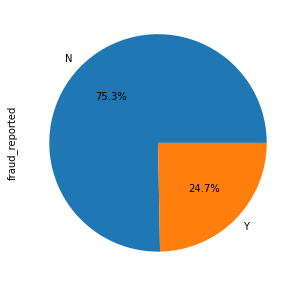

In [25]:
df['fraud_reported'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

Around 24% of claims were found as fraud.

<AxesSubplot:ylabel='police_report_available'>

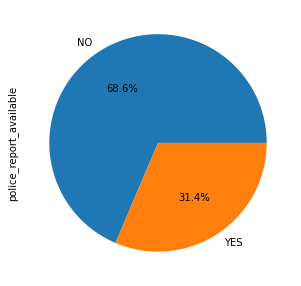

In [26]:
df['police_report_available'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

We have 31.4% of the case where Police report is available.

<AxesSubplot:ylabel='insured_sex'>

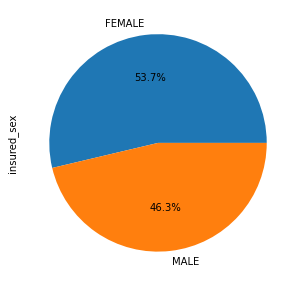

In [27]:
df['insured_sex'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

53.7% cases reported for claim are of female

<AxesSubplot:ylabel='incident_type'>

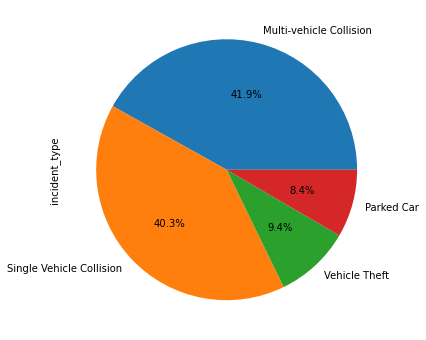

In [28]:
df['incident_type'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

41.9% and 40.3% of the claims reproted are of Multiple and Single vehicle collission.

<AxesSubplot:ylabel='authorities_contacted'>

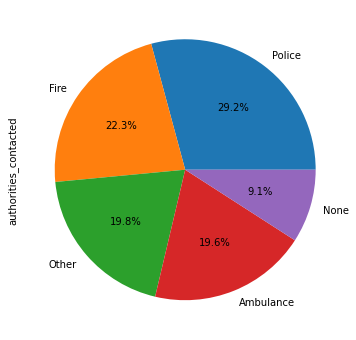

In [29]:
df['authorities_contacted'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

29.2% of the claimers have contacted police. Only 9.1% have contacted no authorities.

<AxesSubplot:ylabel='witnesses'>

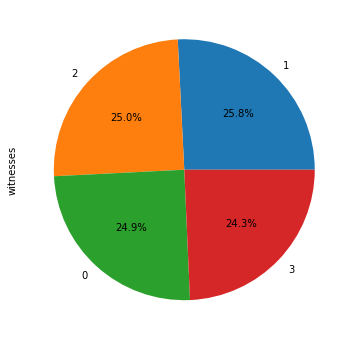

In [30]:
df['witnesses'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

Number of witnesses are euqally disributed

<AxesSubplot:ylabel='incident_state'>

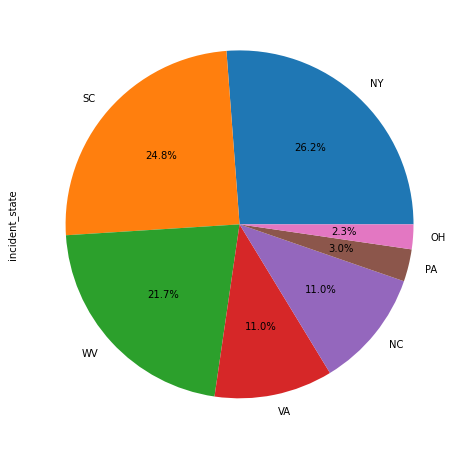

In [31]:
df['incident_state'].value_counts().plot.pie(figsize = (8,8), autopct = '%.1f%%')

Majority of the claims are reported from state NY, SC and WV

<AxesSubplot:ylabel='incident_city'>

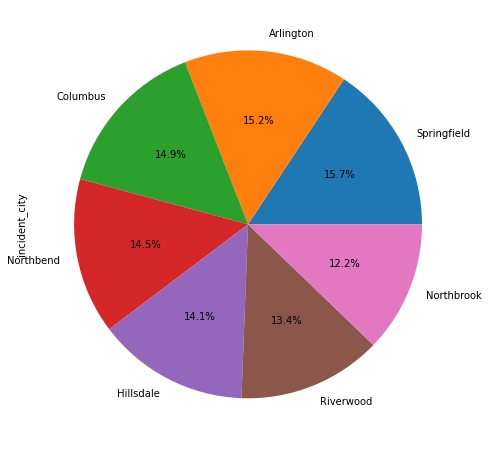

In [32]:
df['incident_city'].value_counts().plot.pie(figsize = (8,8), autopct = '%.1f%%')

Majority of the claims are reported from city Springfiled and Arlington

<AxesSubplot:ylabel='Month'>

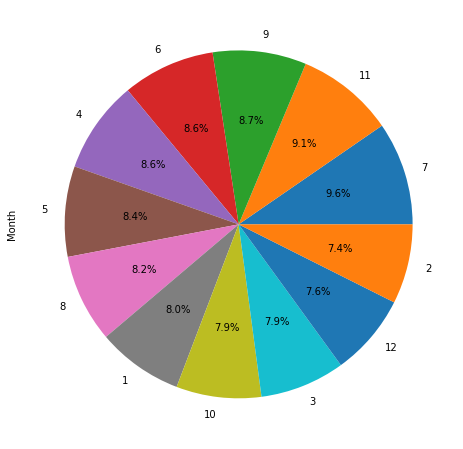

In [33]:
df['Month'].value_counts().plot.pie(figsize = (8,8), autopct = '%.1f%%')

Most of the incidents were reported either in July or Nov. Least cases are reported in Feb.

## Bivariate Analysis

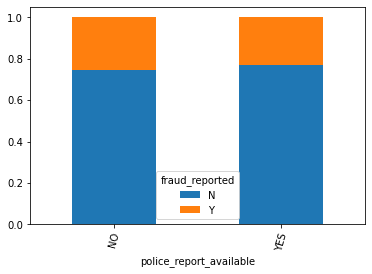

In [34]:
ct = pd.crosstab(df.police_report_available, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

There are many cases where police report is not avaiable and it increase the chances of fraud.

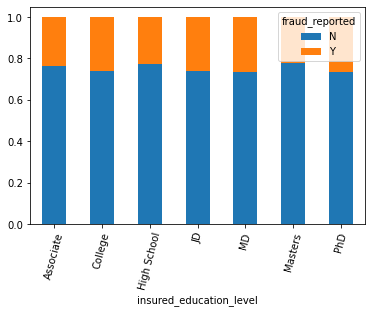

In [35]:
ct = pd.crosstab(df.insured_education_level, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

There is not much relation between education level and person doing fraud.

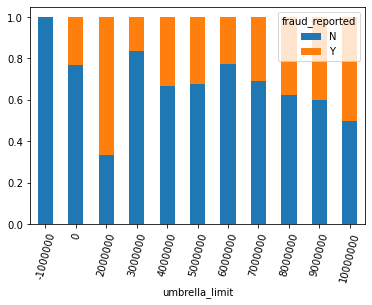

In [36]:
ct = pd.crosstab(df.umbrella_limit , df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Having umbrella unit of 2000000 increases the chance of Insurance fraud.

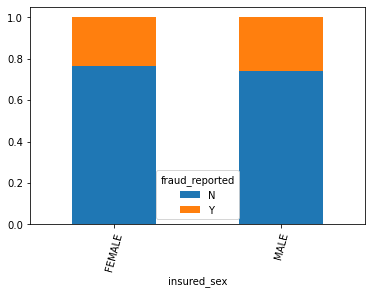

In [37]:
ct = pd.crosstab(df.insured_sex, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Sex has no relation with the Fraud.

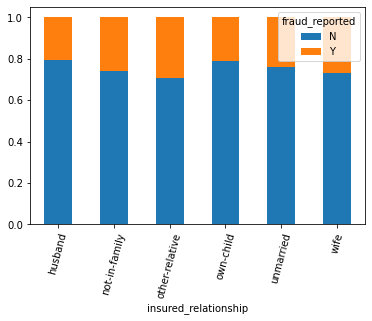

In [38]:
ct = pd.crosstab(df.insured_relationship, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Insured relation ship 'other-relative' has higher chance of fraud.

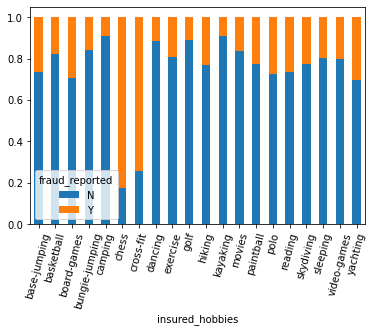

In [39]:
ct = pd.crosstab(df.insured_hobbies, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

People who has Chess and crossfit as hobbies are most likely that their claim is fraud.

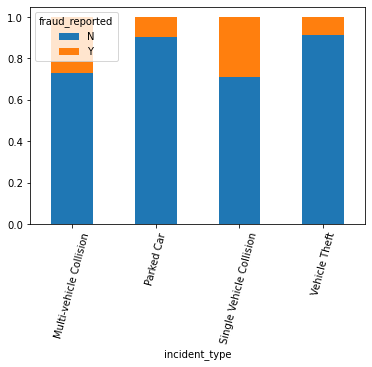

In [40]:
ct = pd.crosstab(df.incident_type, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Incident type of Parked car and vehicle theft has less chance that the claim is fraud.

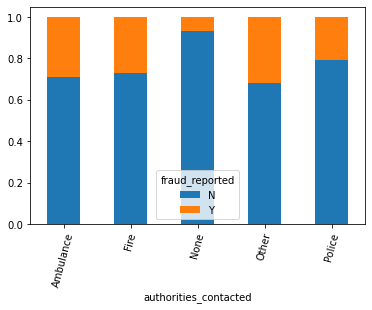

In [41]:
ct = pd.crosstab(df.authorities_contacted, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Chances of Fraud claim is less if None of the authorities are contacted. It inrease if 'Other' is the category of authorities.

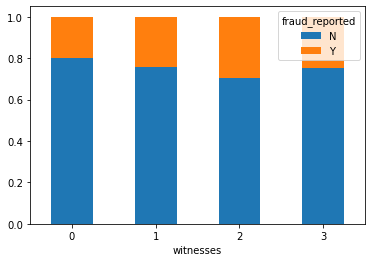

In [42]:
ct = pd.crosstab(df.witnesses, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=360)
plt.show()

Fraud claim is likely if having 2 witnesses.

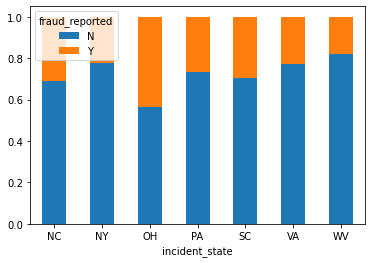

In [43]:
ct = pd.crosstab(df.incident_state, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=360)
plt.show()

NY and WV have least chance that the claim is fraud.

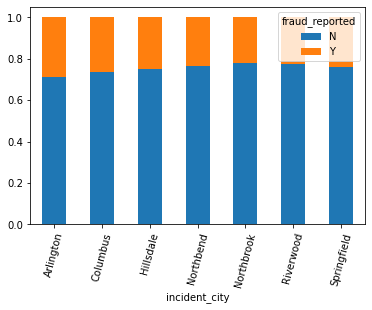

In [44]:
ct = pd.crosstab(df.incident_city, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Chances of fraud claim is likely in city of Arlington and Columbus

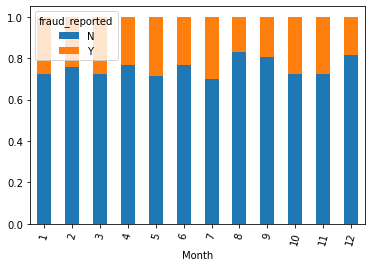

In [45]:
ct = pd.crosstab(df.Month, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

No such strong relation between months and fraud claim. However Dec months is more likely to have less fraud claims.

### Lets plot the histogram and see the relations

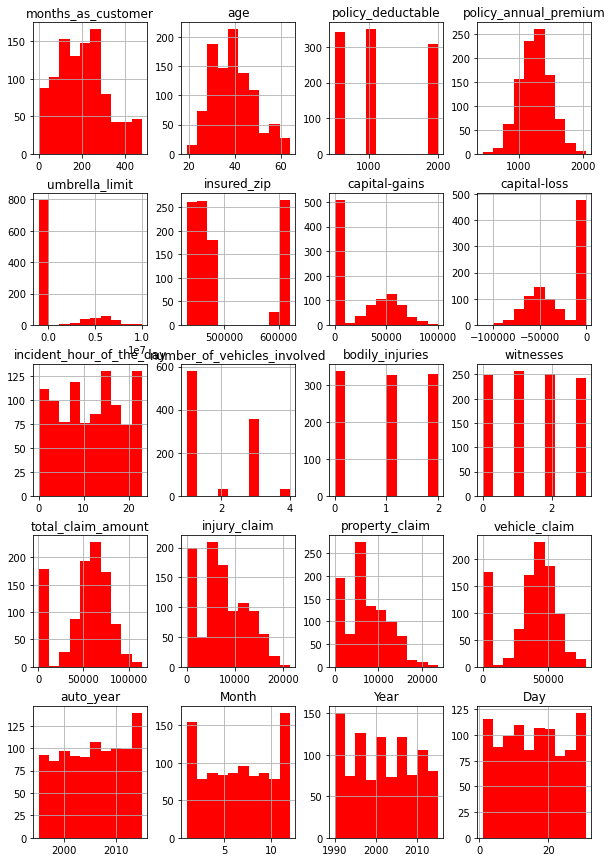

In [46]:
df.hist(figsize=(10,15),color = 'red');

Most of the data is normally distributed.

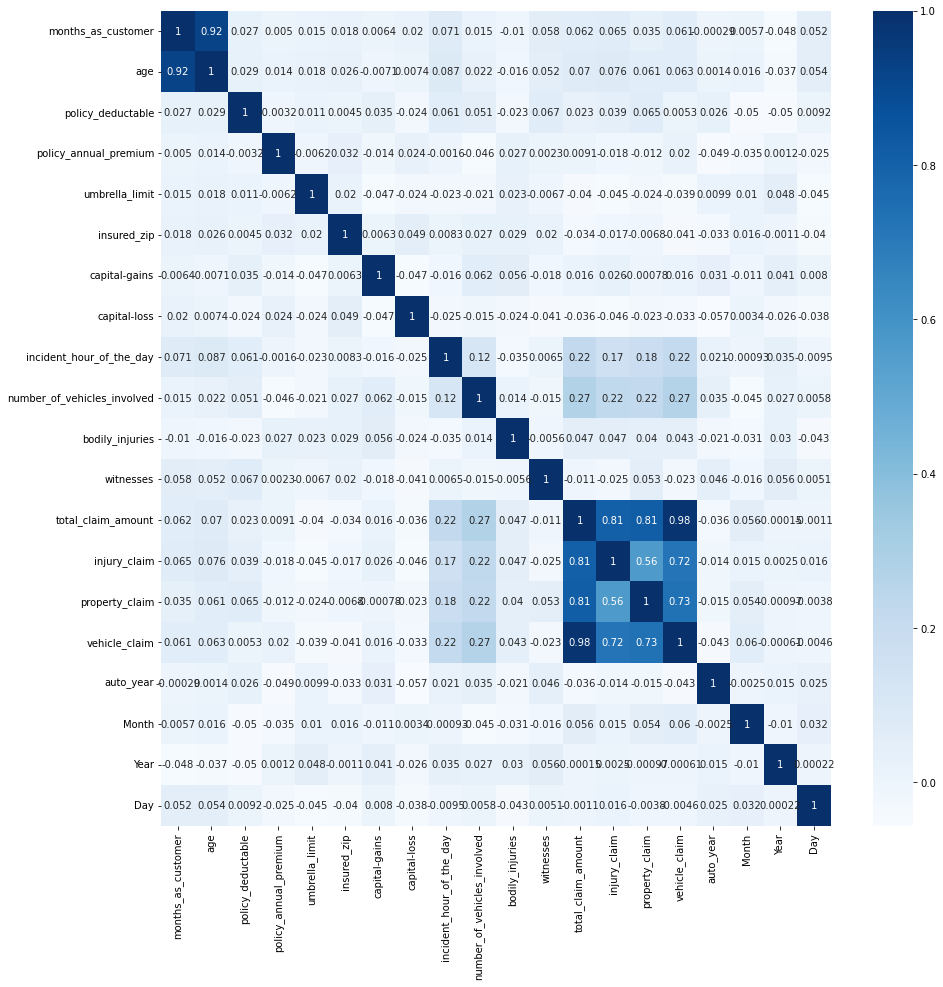

In [47]:
# Heatmap
cor=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True, cmap='Blues')
plt.show()

Total_claim_amount, injury_claim, property_claim and Vehicle_claim are highly corelated with each other

# EDA Concluding Remarks
* There were 247 frauds and 753 non-frauds. 24.7% of the data were frauds while 75.3% were non-fraudulent claims.

* Total_claim_amount, injury_claim, property_claim and Vehicle_claim are highly corelated with each other

* Around 24% of claims were found as fraud and We only 31.4% of the case where Police report is available.

* Having umbrella unit of 2000000 increases the chance of Insurance fraud.

* Most of the claimers has the reading as hobby while few has basketball and people with Chess and crossfit as hobbies are most likely that their claim is fraud.

* 41.9% and 40.3% of the claims reproted are of Multiple and Single vehicle collission and among w29.2% of the claimers have contacted police. Only 9.1% have contacted no authorities. Also Chances of Fraud claim is less if None of the authorities are contacted. It inrease if 'Other' is the category of authorities.

* Majority of the claims are reported from state NY, SC and from city Springfiled and Arlington.

* Most of the incidents were reported either in July or Nov. Least cases are reported in Feb. However Dec months is more likely to have less fraud claims.

* Most of the data is normally distributed with few outliers.

# PreProcessing Pipeline
## Outliers Detection

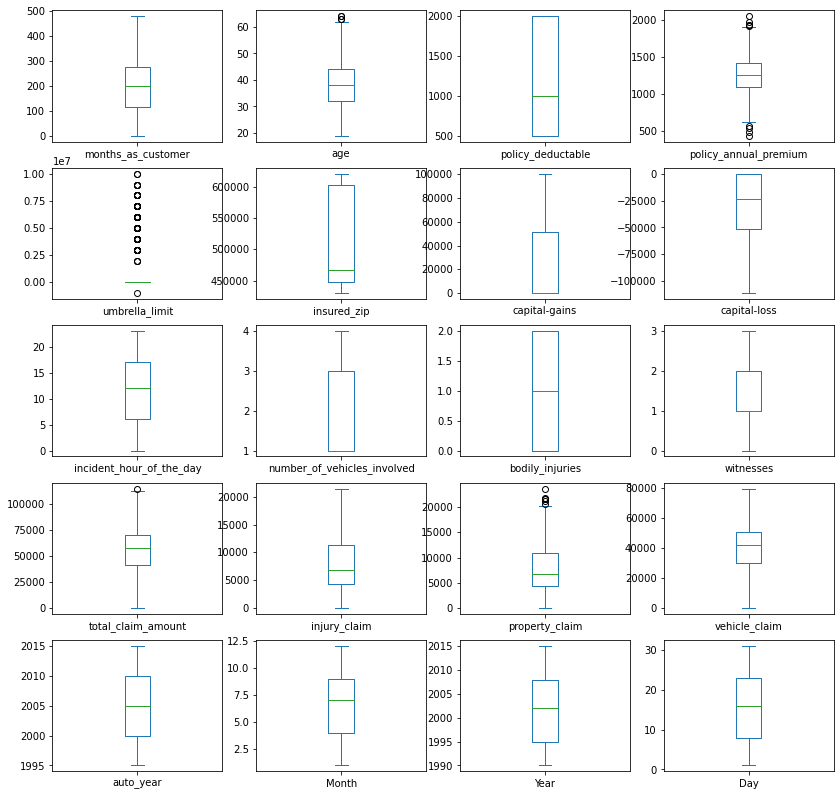

In [48]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(14,14))
plt.show()

Umbrella limit and property claim has outliers present.

### Outlier Removal

In [49]:
df[df["property_claim"]>20000]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
163,112,30,OH,500/1000,1000,1166.54,0,479852,FEMALE,Masters,...,10790,21580,75530,Dodge,Neon,1997,Y,9,2002,13
299,119,27,IN,250/500,2000,1097.64,0,614812,MALE,High School,...,7080,21240,35400,Accura,TL,2006,N,5,1997,8
301,107,31,IL,100/300,2000,1018.73,5000000,469646,MALE,Associate,...,14420,21630,57680,Honda,CRV,2001,N,11,1994,25
421,147,37,IN,250/500,1000,1306.78,0,466818,MALE,MD,...,13520,20280,47320,Toyota,Camry,1995,N,2,1992,10
500,1,29,OH,500/1000,500,854.58,0,612826,FEMALE,JD,...,7890,23670,55230,Honda,CRV,2003,N,5,2006,24
591,43,43,IL,500/1000,500,1320.39,0,604861,FEMALE,Associate,...,7270,21810,50890,Honda,CRV,1996,Y,7,1997,11
687,194,41,IL,250/500,500,1203.81,0,613119,MALE,JD,...,13700,20550,61650,Saab,95,1999,N,2,1993,15
745,258,41,IL,100/300,500,1042.25,0,601206,MALE,Masters,...,6770,20310,54160,Mercedes,C300,2008,Y,2,2001,15


In [50]:
#replacing the property claim of 23670 with 21810 the second highest value.

df.loc[(df["vehicle_claim"] == 55230 )& (df['property_claim']==23670), 'property_claim']=21810

In [51]:
df[df["umbrella_limit"]>6000000]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
31,166,37,IL,100/300,2000,1337.28,8000000,610393,MALE,JD,...,7460,7460,52220,Ford,F150,2006,Y,6,2008,19
48,175,34,IN,500/1000,1000,1123.87,8000000,446326,FEMALE,PhD,...,810,810,5670,Volkswagen,Passat,1995,N,7,2008,1
50,430,59,OH,250/500,2000,1326.62,7000000,477310,MALE,MD,...,16360,8180,57260,Nissan,Pathfinder,1998,N,10,2004,1
66,107,31,IN,250/500,500,1239.22,7000000,476458,FEMALE,High School,...,13800,13800,62100,Audi,A5,2009,Y,8,2011,17
88,31,36,IL,500/1000,2000,1318.24,9000000,601748,FEMALE,College,...,940,470,3290,Dodge,Neon,2002,N,8,1999,15
115,258,46,IN,100/300,1000,1110.37,10000000,455365,MALE,MD,...,4770,9540,33390,Accura,MDX,1997,Y,9,1999,3
119,245,39,OH,250/500,500,964.79,8000000,460675,FEMALE,Associate,...,13240,6620,52960,BMW,3 Series,2010,N,4,2001,21
154,101,33,OH,100/300,1000,1053.04,7000000,619540,FEMALE,Masters,...,9040,9040,36160,Saab,93,2013,Y,6,2012,23
157,428,59,IN,250/500,500,1344.36,7000000,473329,FEMALE,JD,...,1300,650,4550,Saab,92x,2013,N,9,1999,29
161,278,48,IN,500/1000,2000,1142.62,7000000,475588,FEMALE,MD,...,11700,11700,52650,Chevrolet,Silverado,1997,N,7,1999,24


we will not rectify the outlier in umbrella_limit, as we will loss lots of data

# Skewness

In [52]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.368941
vehicle_claim                 -0.621098
auto_year                     -0.048289
Month                         -0.029321
Year                           0.052511
Day                            0.024372
dtype: float64

Columns umbrella_limit and insured_zip has skewness

In [53]:
columns=['umbrella_limit','insured_zip']
for i in columns:
    df[i]=np.cbrt(df[i])
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.523380
insured_zip                    0.794586
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.368941
vehicle_claim                 -0.621098
auto_year                     -0.048289
Month                         -0.029321
Year                           0.052511
Day                            0.024372
dtype: float64

A variety of methods were used to reduce the skewness, but it did not work. Some were increasing the skew in total claim amount and vehicle claim.

# Label Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes==object:
        df[i]=le.fit_transform(df[i])

In [55]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
0,328,48,2,1,1000,1406.91,0.000000,77.535925,1,4,...,6510,13020,52080,10,1,2004,1,10,2014,17
1,228,42,1,1,2000,1197.22,170.997595,77.649092,1,4,...,780,780,3510,8,12,2007,1,6,2006,27
2,134,29,2,0,2000,1413.14,170.997595,75.515384,0,6,...,7700,3850,23100,4,30,2007,0,6,2000,9
3,256,41,0,1,2000,1415.74,181.712059,84.721905,0,6,...,6340,6340,50720,3,34,2014,1,5,1990,25
4,228,44,0,2,1000,1583.91,181.712059,84.841967,1,0,...,1300,650,4550,0,31,2009,0,6,2014,6


## Split the Features and Labels

In [56]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']
y=pd.DataFrame(data=y)

x.shape,y.shape

((1000, 38), (1000, 1))

Since our data is imbalance we will now balance it using Oversampling from SMOTE.

# SMOTE

In [57]:
from imblearn.over_sampling import SMOTE

SM=SMOTE()

X,Y=SM.fit_resample(x,y)

y_new=pd.DataFrame(data=Y)
x_new=pd.DataFrame(data=X)

x_new.shape,y_new.shape

((1506, 38), (1506, 1))

<AxesSubplot:ylabel='fraud_reported'>

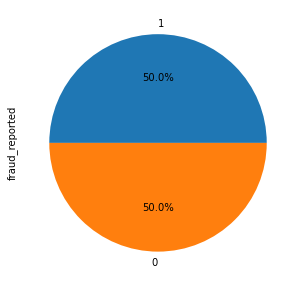

In [58]:
y_new['fraud_reported'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

we can observe that now our target variable is now balanced.

# Data Standardization

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x_new)
sc_x=pd.DataFrame(sc_x,columns=x_new.columns)
sc_x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Month,Year,Day
0,1.126232,1.045659,1.348730,0.231967,-0.244065,0.676870,-0.565073,-0.514902,1.254735,0.612507,...,0.664558,-0.263006,1.150148,0.697910,0.963291,-1.748774,-0.180599,1.146360,1.810268,0.163197
1,0.212751,0.362465,0.088688,0.231967,1.468648,-0.232416,1.958865,-0.481744,1.254735,0.612507,...,-2.030297,-1.497515,-1.513081,-2.047877,0.436428,-0.694891,0.347522,-0.102405,0.647062,1.353393
2,-0.645921,-1.117789,1.348730,-1.066702,1.468648,0.703886,1.958865,-1.106913,-0.796981,1.702857,...,-0.832313,-0.006625,-0.845098,-0.940404,-0.617297,1.029645,0.347522,-0.102405,-0.225342,-0.788959
3,0.468526,0.248599,-1.171353,0.231967,1.468648,0.715160,2.117011,1.590565,-0.796981,1.702857,...,0.332055,-0.299632,-0.303314,0.621026,-0.880728,1.412875,1.579805,-0.414597,-1.679349,1.115354
4,0.212751,0.590196,-1.171353,1.530636,-0.244065,1.444402,2.117011,1.625743,1.254735,-1.568192,...,-1.972382,-1.385483,-1.541367,-1.989083,-1.671022,1.125452,0.699603,-0.102405,1.810268,-1.146017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,0.495930,0.590196,0.088688,0.231967,-1.100421,0.964910,-0.565073,0.878917,-0.796981,-1.023017,...,0.778039,-0.166702,0.884260,0.900127,0.963291,0.358992,-0.708720,-1.038979,0.647062,-0.193861
1502,0.368043,0.134733,1.348730,0.231967,-1.100421,1.670189,-0.565073,0.275812,1.254735,-0.477843,...,-0.140618,-0.615908,0.437343,-0.148269,-0.090434,-1.557159,-0.884761,-1.038979,0.356261,1.115354
1503,-0.682460,-1.117789,-1.171353,-1.066702,-0.244065,0.234751,0.445559,0.249763,1.254735,-0.477843,...,-0.280423,0.088603,-0.632518,-0.250310,-0.090434,-0.215853,-0.884761,-0.102405,-1.533948,-0.788959
1504,1.016614,0.931793,-1.171353,-1.066702,-0.244065,-0.502893,-0.565073,-0.649318,1.254735,-0.477843,...,0.167383,-0.428469,0.149479,0.307270,0.436428,-0.407468,0.171482,-0.414597,-0.516144,0.044178


From co-relation heatmap we have understood that most of the features are co related to each other hence we will use PCA to avoid multi colinearity.

# PCA

In [60]:
from sklearn.decomposition import PCA
testPCA=PCA()
Y=testPCA.fit(sc_x)

#Checking the cumulative sum of the expalined variance ratio.

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 10.19688167,  15.56692646,  20.05119367,  24.40640438,
        28.00267815,  31.35303305,  34.66289915,  37.85788114,
        40.93480826,  43.90369599,  46.83445811,  49.72592976,
        52.59103794,  55.32822631,  58.02377461,  60.70451523,
        63.3159475 ,  65.84262336,  68.32431768,  70.74797602,
        73.13535475,  75.47949147,  77.74963528,  79.99716843,
        82.20904815,  84.30278289,  86.37240884,  88.4122384 ,
        90.38976338,  92.30905565,  94.21199693,  96.00520944,
        97.65579126,  98.81848969,  99.41889466,  99.81536253,
        99.99999397, 100.        ])

The variance above shows the number of components in relation to the data we will get. We take 32 components with a variation rate of 95.96%

In [61]:
FinalPCA=PCA(n_components=32)
final_x=FinalPCA.fit_transform(sc_x)
finalx=pd.DataFrame(final_x)

finalx


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.347882,1.609506,-0.019648,3.235840,2.415626,-0.507595,0.023395,1.228957,-0.343957,0.103197,...,-0.195828,-1.061075,0.657019,-0.775843,0.577213,2.400254,-0.108957,0.047464,0.212801,0.467789
1,-4.222545,0.781807,-0.495568,-0.289261,0.268783,-1.246938,-0.965374,-0.329181,-0.680305,-0.003509,...,-0.185553,0.248193,0.066461,-0.239902,-0.600892,0.326340,0.772598,-0.372105,1.412715,0.313980
2,-0.952302,-1.156579,1.150183,-1.094884,-2.117439,0.557994,-0.620614,1.064857,-1.069110,-0.453558,...,0.361398,0.079834,-1.259393,-1.442675,0.171187,-0.711347,-0.604064,0.457209,0.981054,-1.520353
3,0.014111,1.092149,-1.370094,-2.873578,-2.553990,-1.158535,0.112969,2.899133,-0.090555,-0.647343,...,0.381573,0.044630,1.886665,0.035471,0.231240,0.222040,-1.209103,0.284278,-1.050719,-1.163776
4,-3.519700,1.219237,-0.262404,-1.951239,-1.156020,1.387984,2.164045,0.033003,-0.736541,1.070919,...,1.244079,0.001501,1.116625,2.299336,-1.793602,1.640540,0.582320,-0.390541,-1.326271,-0.129440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,0.934187,0.962964,-1.452202,-0.286208,1.186682,1.312615,-0.750094,0.241180,-0.122360,-0.017572,...,-0.317564,0.540296,-0.181545,0.840809,-0.032996,-0.132764,1.007632,0.176504,0.935961,-0.272950
1502,0.320785,0.492602,1.339960,0.427164,2.478081,0.163988,-0.493251,-0.546198,0.065318,0.453539,...,-0.463755,-0.722552,0.120623,1.300326,-0.494792,0.132032,-0.263812,-0.372737,0.312102,0.324517
1503,-0.338308,-1.360516,-0.389556,-0.815862,0.798752,0.472479,-1.192764,0.276661,-0.505257,0.280993,...,0.561058,-1.183476,-0.985817,-0.418932,0.455375,0.141261,0.503910,-0.281040,-0.211914,-0.190999
1504,0.463443,1.252650,1.096025,-1.210467,0.585113,0.312058,-0.854592,-1.388511,0.155842,-0.197786,...,1.243461,-0.307037,-0.701143,0.964799,-0.085822,0.367685,0.331010,-0.754148,-1.017903,-0.289004


Above shown is our final dataset after the PCA.

In [62]:
#reassign x to finalx

x=finalx
x

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.347882,1.609506,-0.019648,3.235840,2.415626,-0.507595,0.023395,1.228957,-0.343957,0.103197,...,-0.195828,-1.061075,0.657019,-0.775843,0.577213,2.400254,-0.108957,0.047464,0.212801,0.467789
1,-4.222545,0.781807,-0.495568,-0.289261,0.268783,-1.246938,-0.965374,-0.329181,-0.680305,-0.003509,...,-0.185553,0.248193,0.066461,-0.239902,-0.600892,0.326340,0.772598,-0.372105,1.412715,0.313980
2,-0.952302,-1.156579,1.150183,-1.094884,-2.117439,0.557994,-0.620614,1.064857,-1.069110,-0.453558,...,0.361398,0.079834,-1.259393,-1.442675,0.171187,-0.711347,-0.604064,0.457209,0.981054,-1.520353
3,0.014111,1.092149,-1.370094,-2.873578,-2.553990,-1.158535,0.112969,2.899133,-0.090555,-0.647343,...,0.381573,0.044630,1.886665,0.035471,0.231240,0.222040,-1.209103,0.284278,-1.050719,-1.163776
4,-3.519700,1.219237,-0.262404,-1.951239,-1.156020,1.387984,2.164045,0.033003,-0.736541,1.070919,...,1.244079,0.001501,1.116625,2.299336,-1.793602,1.640540,0.582320,-0.390541,-1.326271,-0.129440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,0.934187,0.962964,-1.452202,-0.286208,1.186682,1.312615,-0.750094,0.241180,-0.122360,-0.017572,...,-0.317564,0.540296,-0.181545,0.840809,-0.032996,-0.132764,1.007632,0.176504,0.935961,-0.272950
1502,0.320785,0.492602,1.339960,0.427164,2.478081,0.163988,-0.493251,-0.546198,0.065318,0.453539,...,-0.463755,-0.722552,0.120623,1.300326,-0.494792,0.132032,-0.263812,-0.372737,0.312102,0.324517
1503,-0.338308,-1.360516,-0.389556,-0.815862,0.798752,0.472479,-1.192764,0.276661,-0.505257,0.280993,...,0.561058,-1.183476,-0.985817,-0.418932,0.455375,0.141261,0.503910,-0.281040,-0.211914,-0.190999
1504,0.463443,1.252650,1.096025,-1.210467,0.585113,0.312058,-0.854592,-1.388511,0.155842,-0.197786,...,1.243461,-0.307037,-0.701143,0.964799,-0.085822,0.367685,0.331010,-0.754148,-1.017903,-0.289004


In [63]:
y=y_new
x.shape,y.shape

((1506, 32), (1506, 1))

# Building Machine Learning Model

In [64]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score

In [65]:
#check the best possible random state to train our model
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.8112582781456954  on Random state 130


## Train Test Split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=130)

In [67]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
adc=AdaBoostClassifier(n_estimators=100)

model=[lg,sv,knn,rfc,dtc,gnb,adc]

Test=[]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    Test.append(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('-------------------------------------------------------------------------------------------')

Accuracy score of LogisticRegression()
0.8112582781456954
[[134  31]
 [ 26 111]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       165
           1       0.78      0.81      0.80       137

    accuracy                           0.81       302
   macro avg       0.81      0.81      0.81       302
weighted avg       0.81      0.81      0.81       302

-------------------------------------------------------------------------------------------
Accuracy score of SVC(probability=True)
0.8609271523178808
[[144  21]
 [ 21 116]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       165
           1       0.85      0.85      0.85       137

    accuracy                           0.86       302
   macro avg       0.86      0.86      0.86       302
weighted avg       0.86      0.86      0.86       302

-------------------------------------------------------------------------------------------

From above we can observe that RandonForest has performed well with 83% accuracy.

# Cross Validation
### We will check the Underfitting or Overfitting of the model using Cross Validation

In [68]:
cv=[]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    cv.append(score.mean())
    print('Mean Accuracy of', m)
    print(score.mean())
    print('-------------------------------------------------------------------------------')

Mean Accuracy of LogisticRegression()
0.7471078744142042
-------------------------------------------------------------------------------
Mean Accuracy of SVC(probability=True)
0.812226353655585
-------------------------------------------------------------------------------
Mean Accuracy of KNeighborsClassifier()
0.6726848694198148
-------------------------------------------------------------------------------
Mean Accuracy of RandomForestClassifier()
0.8022529757321071
-------------------------------------------------------------------------------
Mean Accuracy of DecisionTreeClassifier()
0.691971573782755
-------------------------------------------------------------------------------
Mean Accuracy of GaussianNB()
0.7869749840487559
-------------------------------------------------------------------------------
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.7517766385778091
-------------------------------------------------------------------------------


* RFC is the only model with above 80% score on Cross validation

* We will check the ROC_AUC score to pick the final model

# ROC_AUC score

In [69]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

ROC_AUC score of LogisticRegression()
0.8111700951117009


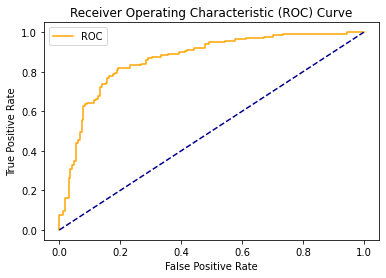

-------------------------------------------------------------------------------
ROC_AUC score of SVC(probability=True)
0.859721300597213


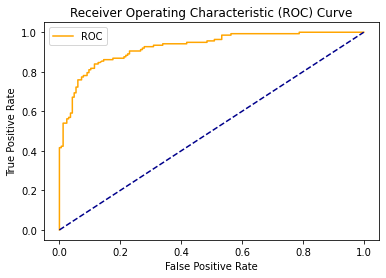

-------------------------------------------------------------------------------
ROC_AUC score of KNeighborsClassifier()
0.6471798274717983


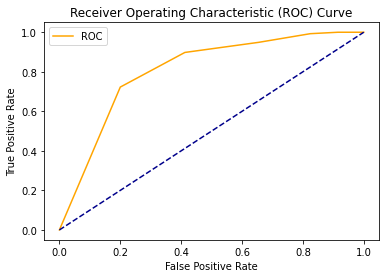

-------------------------------------------------------------------------------
ROC_AUC score of RandomForestClassifier()
0.8354125193541252


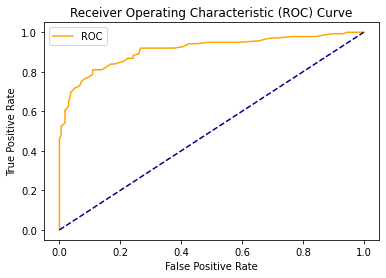

-------------------------------------------------------------------------------
ROC_AUC score of DecisionTreeClassifier()
0.6747401017474011


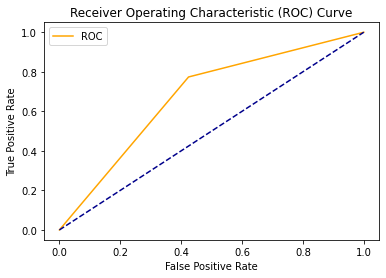

-------------------------------------------------------------------------------
ROC_AUC score of GaussianNB()
0.8269409422694094


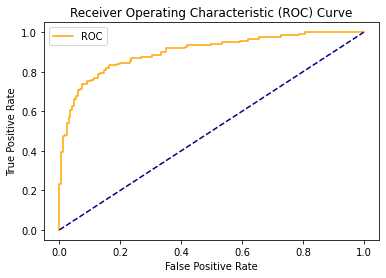

-------------------------------------------------------------------------------
ROC_AUC score of AdaBoostClassifier(n_estimators=100)
0.774740101747401


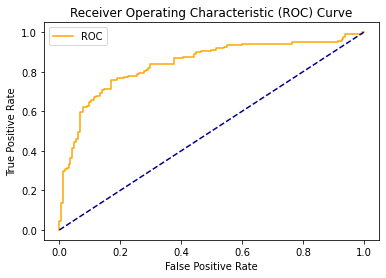

-------------------------------------------------------------------------------


In [70]:
auc = []
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    score = roc_auc_score(y_test,pred)
    auc.append(score)
    print('ROC_AUC score of', m)
    print(score)
    probs = m.predict_proba(x_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    print('-------------------------------------------------------------------------------')

In [71]:
 Performance={'Model':['LogisticRegression','SVC','KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','AdaBoostClassifier'],
           'Test Score':Test,'Cross Validation Score':cv,'ROC AUC Score':auc}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Test Score,Cross Validation Score,ROC AUC Score
0,LogisticRegression,0.811258,0.747108,0.811170
1,SVC,0.860927,0.812226,0.859721
2,KNeighborsClassifier,0.619205,0.672685,0.647180
3,RandomForestClassifier,0.834437,0.802253,0.835413
4,DecisionTreeClassifier,0.678808,0.691972,0.674740
5,GaussianNB,0.827815,0.786975,0.826941
6,AdaBoostClassifier,0.774834,0.751777,0.774740


We can conclude that RFC and GaussianNB has performed well with less overfitting and underfitting.

Lets Hypertune the RandomForest model to check if we can improve the accuracy.
# Hyper Parameter Tuning with RFC

In [72]:
from sklearn.model_selection import GridSearchCV

rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [73]:
parameters = {'max_depth': [10, 20, 30, 40, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [5, 10, 20, 30, 50,100],
             'criterion':['gini', 'entropy']}

In [74]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

Random Forest classifier Performance after HyperTuning
-----------------------------------------------
Accuracy Score 84.43708609271523
Cross Validation Score 80.88974940045324
AUC ROC Score 84.45697854456978


AUC ROC Curve with Final Mod


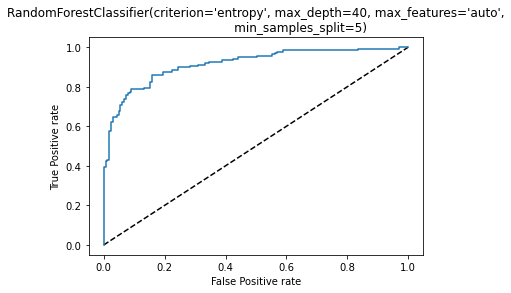

In [75]:
Finalmod=RandomForestClassifier(max_features= 'auto', min_samples_leaf= 1, min_samples_split=5,n_estimators=100,max_depth=40,criterion='entropy')
Finalmod.fit(x_train,y_train)
pred1=Finalmod.predict(x_test)
acc1=accuracy_score(y_test,pred1)

cvs1=cross_val_score(Finalmod,x,y,cv=5)
y_pred_prob=Finalmod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
auc_score1=roc_auc_score(y_test,Finalmod.predict(x_test))

print('Random Forest classifier Performance after HyperTuning')
print('-----------------------------------------------')
print('Accuracy Score',acc1*100)
print('Cross Validation Score',cvs1.mean()*100)
print('AUC ROC Score',auc_score1*100)
print('\n')
print('AUC ROC Curve with Final Mod')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=RandomForestClassifier)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(Finalmod)
plt.show()

If we observe the above metrics, We got good values with hyperparameter tuning model compare to model without hyper parameter tuning with Random Forest Classifier, Increased accuracy from 83.1 to 85% with the CV score of 80% and AUC ROS score of 84.6%
# Save The Model

In [76]:
import joblib
joblib.dump(Finalmod,'RandomForestClassifier.obj')

['RandomForestClassifier.obj']

The above dataframe have original data with the predicted data from the best model.

# Concluding Remarks:-
This project has built a model that can detect auto insurance fraud. In doing so, the model can reduces loses for insurance companies. The challenge behind fraud detection in machine learning is that frauds are far less common as compared to legit insurance claims.